In [1]:
# Importing all the required packages, libraries and python script

from Gupta_Smita_Capstone_Project_Code import (
    data_manipulation,change_multi_to_single_value,column_group_aggregation,find_annotation_position,calc_prevalence)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


# Introduction

"What drives total assessed value for a single family residential homes in Boston City?"

The property assessment process is required in a city for generating property tax revenues that pay for schools, roads, fire protection, police protection, and other local services. As per assessing department of Boston(City of Boston,2019), the market value of any property is assessed by comparing other properties with similar characteristics.Each property has unique characteristics that affects its value. The property characteristics are often included while assessing any property which can include living area, number of bedrooms,number of bathtooms, number of floors, interior condition, heating type, the year when the property is built etc.  

I have used Boston Property assessment dataset for year 2017 as my story for the capstone project to assess the impact of single family residential property's characteristics and identifying the relationships on total assessed value. This project will also include prediction of total assessed value based on the median value using machine learning algorithm. The project has been divided into following sections which will included exploratory and predictive data analysis:

- Data Extraction
- Data Clean up
- Data Visualization
- Descriptive analysis
- Predictive analysis
- Conclusion

# Data Extraction

Boston property assessment data for 2017 is publically available and is downloadable through URL from Boston government data website(Property Assessment,n.d.). This dataset contains the the information of various types such as residential, commericial and agrigultural of properties. It includes the structural , internal and external characteristics of each property such as living area, number of bedrooms, number of baths, number of floors , bath style, building style, heat type, number of fireplace, kitchen style, exterior finish, view along with the location including street number,street name and zipcode. Each property is identified by 10-digit parcel number and contains the respective total assessed value and gross tax. Colum LU indicates the type of the property which I have used to identify the single family residential homes. The dataset has used many abbrevated values to define various conditions in the columns such as Average interior condition is indicated by "A" in the dataset. The columns that are related to residential property characteristics are prefixed by "R_".

For the capstone project, I have focussed on only single family residential properties and selected few of the characteristics to evaluate the significance on total assessed value. In this project, the dependent variable has been chosen as "Total Assessed Value". There can be many questions that can be answered with such type of dataset and the objective of project is to find the answers of following questions using Python programming for single family residential homes and solve a classification problem by building a prediction model for predicting total assessed value :

- What is the median total assessed value ?
- What is the distribution of total assessed value?
- What is the trend of age( when the property is built) of the property with total assessed value?
- What is the trend of remodeling year of the property with total assessed value?
- Is there any specfic type of exterior or interior finish that is significant for total assessed value?
- Which exterior finish is most popular?
- Is there any significance of interior, exterior condition or overall condition on total assessed value?
- Where are the most properties located and which location has higher total assessed value?


In [2]:
# Import the Boston property dataset from URL

prop_data_url = "https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/062fc6fa-b5ff-4270-86cf-202225e40858/download/property-assessment-fy2017.csv"
prop_data = pd.read_csv(filepath_or_buffer = prop_data_url,low_memory=False)

# Find the shape of the dataset imported
prop_data_shape = prop_data.shape
number_of_rows = prop_data_shape[0]
number_of_cols = prop_data_shape[1]

print ("The dataset has been loaded successfully and has {} rows and {} columns.".format(number_of_rows,number_of_cols))



The dataset has been loaded successfully and has 170910 rows and 75 columns.


# Data Cleanup

Data cleaning is one of the crucial part of a project. It is important to handle messy data, missing values, incomplete data or inconsistent formatting.Python provided many inbuilt libraries and functons for data cleaning. I have created few custom functions which have been called from a python script to perform the data cleaning operations. 

The original dataset contains 170910 rows and 75 columns. With the help of data key ("Property Assessment FY2017 data key",2019) provided on Boston website with the dataset, I have selected few of the columns that defines the features of a residential property. There is column "LU" which indicates the type of property which I have considered to subset the data pertaining to my project related to single family residential properties.

## Choose story columns and filter dataset:

I have chosen few of the characteristic columns from the dataset and filtered the data pertaining to single family.

In [3]:
# Choose list of columns to be included in the project

columns_list = ['PID','ZIPCODE','LU','YR_BUILT','AV_TOTAL','LIVING_AREA','YR_REMOD','NUM_FLOORS','R_BDRMS',
                'R_FULL_BTH','R_BLDG_STYL','R_EXT_FIN','R_BTH_STYLE','R_KITCH_STYLE','R_EXT_CND','R_OVRALL_CND',
                'R_INT_CND','R_INT_FIN','R_VIEW']     

# Subsetting data only for single family homes based on Property Type

LU_list = ['R1']
prop_data_subset = prop_data.loc[:,columns_list]
prop_single_family = prop_data_subset[prop_data_subset.LU.isin(LU_list)]


## Rename columns

The columns are abbrevated and hence I have renamed the selected columns with easy to meaningful names.

In [4]:
# Renaming columns

column_mapping={
                    'PID':'Parcel_Number',
                    'ZIPCODE' : 'Zipcode',
                    'LU':'Property_Type',
                    'YR_BUILT':'Year_Built',
                    'AV_TOTAL':'Total_Assessed_Value',
                    'LIVING_AREA': 'Living_Area',
                    'YR_REMOD':'Remodeling_Year',
                    'NUM_FLOORS':'Number_of_Floors',
                    'R_BDRMS':'Number_of_Bedrooms', 
                    'R_FULL_BTH':'Number_of_Baths', 
                    'R_BLDG_STYL':'Building_Style', 
                    'R_EXT_FIN':'Exterior_Finish',  
                    'R_BTH_STYLE':'Bath_Style',
                    'R_KITCH_STYLE':'Kitchen_Style',  
                    'R_EXT_CND':'Exterior_Condition',      
                    'R_OVRALL_CND':'Overall_Condition',  
                    'R_INT_CND':'Interior_Condition',  
                    'R_INT_FIN':'Interior_Finish',    
                    'R_VIEW':'Residential_View'
                }

prop_single_family = prop_single_family.rename(columns=column_mapping)

## Finding data types of columns

In [5]:
#Checking the dataset columns data types and count of each data type

column_data_types = prop_single_family.dtypes
print(column_data_types)

dtype_counts = prop_single_family.get_dtype_counts()
print("\nThere are {} object, {} float and {} int type of columns.".format(dtype_counts[0],\
                                                                           dtype_counts[1],\
                                                                           dtype_counts[2]))



Parcel_Number            object
Zipcode                  object
Property_Type            object
Year_Built              float64
Total_Assessed_Value      int64
Living_Area             float64
Remodeling_Year         float64
Number_of_Floors        float64
Number_of_Bedrooms      float64
Number_of_Baths         float64
Building_Style           object
Exterior_Finish          object
Bath_Style               object
Kitchen_Style            object
Exterior_Condition       object
Overall_Condition        object
Interior_Condition       object
Interior_Finish          object
Residential_View         object
dtype: object

There are 12 object, 6 float and 1 int type of columns.


It is observed that Year_Built, Remodeling_Year columns have been imported as "float" data types which have been converted into "int" data type during data manipulation. 

## Finding duplicates

Before proceeding to data cleaning, I have checked if dataset has duplicate rows based on parcel number of the property which is done by using data_manipulation function that has been created in python script.Here manipulation_value is kept empty since there is no argument or value required to check the uniqueness as per the function definition.

In [6]:
# Checking if any property has duplicate rows based on parcel number

property_is_unique = data_manipulation(data = prop_single_family, column_name = 'Parcel_Number',\
                                       manipulation_type = "check uniqueness", manipulation_value ="")



The dataset has no duplicate property row based on Parcel_Number.


## Finding Missing values

I then checked dataset for the missing values(if any) and counted the number of rows for each column that have missing values.

In [7]:
# Check if any column has missing values

prop_single_family.isnull().sum()

Parcel_Number              0
Zipcode                    0
Property_Type              0
Year_Built                 0
Total_Assessed_Value       0
Living_Area                0
Remodeling_Year         1611
Number_of_Floors           2
Number_of_Bedrooms         1
Number_of_Baths            1
Building_Style             1
Exterior_Finish            1
Bath_Style                 1
Kitchen_Style              1
Exterior_Condition         1
Overall_Condition          1
Interior_Condition         1
Interior_Finish            1
Residential_View           1
dtype: int64

In the above result, the non-zero number represents the number of missing values in a particular column. Following are the observations:
- Most of the data is missing for Remodling_Year (for 1611 rows). 
- There is missing values for Number_of_Floors in 2 rows. 
- It is also observed that there is a missing value in columns Number_of_Bedrooms, Number_of_Bath, Building_Style, Exterior_Finish, Bath_Style, Kitchen_Style, Exterior_Condition, Overall_Condition,Interior_Condition, Interior_Finish and Residential_View for a row. 

The next steps will be to clean the data for such rows.



## Imputing missing values

I have performed following imputations:
- Imputed Remodeling_Year with 0 (zero) for the missing value, to indicate that the houses are not yet remodeled. 
- Missing Number of Floors are imputed by median value of single family homes. 

I have used custom function from Python script called data_manipulation to impute the values. 


In [8]:
#Imputing Remodeling Year with 0 to indicate that those single family homes are not yet remodeled

prop_single_family['Remodeling_Year'] =data_manipulation(data = prop_single_family,\
                                                         column_name ='Remodeling_Year',
                                                         manipulation_type = 'fill missing by 0', \
                                                         manipulation_value='0')

#Imputing Number of Floors with median value of Number of Floors for single family homes

prop_single_family['Number_of_Floors'] =data_manipulation(data= prop_single_family,\
                                                          column_name = 'Number_of_Floors',
                                                          manipulation_type = 'fill missing by median', \
                                                          manipulation_value='median')



## Removing incomplete rows

There is a row with Year_Built as 0 (zero) and most of the columns have missing values in that row, hence I have excluded that row from the dataset since it seems to be a incomplete entry which is shown below.

In [9]:
# Row with most of the values missing and Year Built = 0

incorrect_prop_entry = prop_single_family[prop_single_family.isna().any(axis=1)]
print("Following is incomplete property data entry:")
incorrect_prop_entry

Following is incomplete property data entry:


,Parcel_Number,Zipcode,Property_Type,Year_Built,Total_Assessed_Value,Living_Area,Remodeling_Year,Number_of_Floors,Number_of_Bedrooms,Number_of_Baths,Building_Style,Exterior_Finish,Bath_Style,Kitchen_Style,Exterior_Condition,Overall_Condition,Interior_Condition,Interior_Finish,Residential_View
152010,2010637010_,02132_,R1,0.0,1393100,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The incomplete row is excluded as below and dataset is updated to contain only those rows where Year_Built > 0:

In [10]:
#Excluding rows that have Year_Built as 0 and other columns have missing values

prop_single_family = prop_single_family[prop_single_family['Year_Built'].loc[:] > 0 ]

## Removing special characters

It is observed that Parcel_Number and Zipcode has special character underscore that has been added to maintain the integrity as per Boston government website(Property Assessment,n.d.), so as part of data cleaning I have removed that special character.

I created used data_manipulation function from python script to remove special character (underscore) from the end of Parcel_Number and Zipcode. 

In [11]:
# Remove special character underscore "_"

prop_single_family['Parcel_Number'] =data_manipulation(data = prop_single_family,\
                                                       column_name = 'Parcel_Number',\
                                                       manipulation_type = "remove end special char"\
                                                       ,manipulation_value ="_")
prop_single_family['Zipcode'] =data_manipulation(data = prop_single_family,\
                                                 column_name = 'Zipcode',\
                                                 manipulation_type = "remove end special char",\
                                                 manipulation_value ="_")


## Manipulating column values

In the dataset, many columns have abbrevated values. The below step is to 
- Replaced the abbrevations of column values with meaningful names using data_manipulation function. 
- The columns such as Building style or Exterior Finish have many categories that are not important to the story and hence I have consolidated them to a single value as "Other" using a function and replace using data_manipulation function

In [12]:
# Created the mappings of the column abbrevations and corresponding meaningful values

residential = {'R1':'1-Family'}
condition = {'A': 'Average', 'E': 'Excellent', 'F': 'Fair', 'P': 'Poor', 'G': 'Good', 'S': 'Special'}
style = {'L': 'Luxury', 'M': 'Modern', 'N': 'No Remodeling', 'S': 'Semi-Modern'}
building_style = { 'BL':'Bi-Level',  'BW':'Bungalow', 'CL':'Colonial', 'CN':'Contemporary', 
                  'CV':'Conventional', 'DK':'Decker','DU':'Duplex','L':'Tri-Level','SD':'Semi-Detatched' }
exterior_finish ={'A':'Asbestos','B':'Brick/Stone','C':'Cement Board','G':'Glass','M':'Vinyl','K':'Concrete',
                 'V':'Brick/Stone Veneer','W':'Wood Shake'}
interior_finish = {'E':'Elaborate','N':'Normal','S':'Substandard'}


# Performing data manipulation to change the values to meaning values

prop_single_family['Property_Type'] = data_manipulation(data = prop_single_family,\
                                                        column_name = 'Property_Type',\
                                                        manipulation_type ="rename column values", \
                                                        manipulation_value = residential)    
prop_single_family['Exterior_Condition'] = data_manipulation(data = prop_single_family,\
                                                             column_name = 'Exterior_Condition',\
                                                             manipulation_type ="rename column values",\
                                                             manipulation_value= condition)
prop_single_family['Interior_Condition'] = data_manipulation(data = prop_single_family,\
                                                             column_name = 'Interior_Condition',\
                                                             manipulation_type ="rename column values",\
                                                             manipulation_value= condition)
prop_single_family['Overall_Condition'] = data_manipulation(data = prop_single_family,\
                                                            column_name = 'Overall_Condition',\
                                                            manipulation_type ="rename column values",\
                                                            manipulation_value= condition)
prop_single_family['Residential_View'] = data_manipulation(data = prop_single_family,\
                                                           column_name = 'Residential_View',\
                                                           manipulation_type ="rename column values",\
                                                           manipulation_value= condition)
prop_single_family['Kitchen_Style'] = data_manipulation(data = prop_single_family,\
                                                        column_name = 'Kitchen_Style',\
                                                        manipulation_type ="rename column values",\
                                                        manipulation_value= style)
prop_single_family['Bath_Style'] = data_manipulation(data = prop_single_family,\
                                                     column_name = 'Bath_Style',\
                                                     manipulation_type ="rename column values",\
                                                     manipulation_value= style)
prop_single_family['Building_Style'] = data_manipulation(data = prop_single_family,\
                                                         column_name = 'Building_Style',\
                                                         manipulation_type ="rename column values",\
                                                         manipulation_value= building_style)
prop_single_family['Exterior_Finish'] = data_manipulation(data = prop_single_family,\
                                                          column_name = 'Exterior_Finish',
                                                          manipulation_type ="rename column values",\
                                                          manipulation_value= exterior_finish)
prop_single_family['Interior_Finish'] = data_manipulation(data = prop_single_family,\
                                                          column_name = 'Interior_Finish',
                                                          manipulation_type ="rename column values",\
                                                          manipulation_value= interior_finish)


# Consolidated many values to be replaced by single value

building_style_others =('CP','OT','RE','RM','RN','RR','VT','TF','TD','TL','SL')
exterior_finish_others =('F','O','P','S','U')

# Performing data manipulation to replace multiple values to single value

prop_single_family['Building_Style'] = change_multi_to_single_value(data=prop_single_family,\
                                                                    column_name='Building_Style',\
                                                                    from_value = building_style_others,\
                                                                    to_value = 'Other')
prop_single_family['Exterior_Finish'] = change_multi_to_single_value(data= prop_single_family,\
                                                                     column_name = 'Exterior_Finish',\
                                                                     from_value = exterior_finish_others,\
                                                                     to_value = 'Other')


## Converting column data type

It is observed  that Year_Built, Remodeling_Year are showing float type of data, I have converted into int type of data using data_manipulation function.

In [13]:
# Convert the data types to int for Year_Built and Remodeling_Year

prop_single_family['Year_Built'] = data_manipulation(data =prop_single_family,\
                                                     column_name = 'Year_Built',\
                                                     manipulation_type = "convert data type",\
                                                     manipulation_value = "int")

prop_single_family['Remodeling_Year'] = data_manipulation(data =prop_single_family,\
                                                          column_name = 'Remodeling_Year',\
                                                          manipulation_type = "convert data type",\
                                                          manipulation_value = "int")



## Display cleaned dataset

All the data manipulation has been performed on the dataset and following is snapshot of top 5 rows of cleaned dataset.

In [14]:
#Shape of the cleaned dataframe

prop_clean_dataset_shape = prop_single_family.shape
prop_clean_data_shape_row =prop_clean_dataset_shape[0]
prop_clean_data_shape_col =prop_clean_dataset_shape[1]

print ("The dataset is cleaned and has {} rows and {} columns.".format(prop_clean_data_shape_row,\
                                                                       prop_clean_data_shape_col))

# Showing top 5 rows of clean dataset

print ("\nFollowing is snapshot of top 10 rows of cleaned dataset:")
prop_single_family.head(10)


The dataset is cleaned and has 30575 rows and 19 columns.

Following is snapshot of top 10 rows of cleaned dataset:


,Parcel_Number,Zipcode,Property_Type,Year_Built,Total_Assessed_Value,Living_Area,Remodeling_Year,Number_of_Floors,Number_of_Bedrooms,Number_of_Baths,Building_Style,Exterior_Finish,Bath_Style,Kitchen_Style,Exterior_Condition,Overall_Condition,Interior_Condition,Interior_Finish,Residential_View
145,0401786000,02215,1-Family,1880,2150600,4375.0,0,3.0,7.0,2.0,Other,Brick/Stone,Semi-Modern,Semi-Modern,Average,Average,Average,Normal,Good
196,0100021000,02128,1-Family,1910,195600,1122.0,1965,2.0,3.0,1.0,Colonial,Vinyl,Semi-Modern,Semi-Modern,Average,Average,Average,Normal,Fair
202,0100027000,02128,1-Family,1900,313400,1968.0,1980,2.0,4.0,1.0,Colonial,Vinyl,Semi-Modern,Semi-Modern,Average,Average,Average,Normal,Average
208,0100033000,02128,1-Family,1920,309900,1111.0,0,1.5,4.0,1.0,Other,Vinyl,Modern,Modern,Average,Average,Average,Normal,Average
217,0100041000,02128,1-Family,1900,306500,1146.0,1991,1.5,3.0,1.0,Other,Vinyl,Semi-Modern,Semi-Modern,Good,Average,Average,Normal,Average
228,0100052000,02128,1-Family,1900,174000,1658.0,0,2.0,5.0,1.0,Colonial,Asbestos,No Remodeling,No Remodeling,Average,Fair,Fair,Normal,Average
229,0100053000,02128,1-Family,1900,285100,1816.0,0,2.0,5.0,2.0,Colonial,Vinyl,Semi-Modern,Semi-Modern,Average,Average,Average,Normal,Average
294,0100118000,02128,1-Family,1905,339900,1798.0,1996,2.0,4.0,2.0,Colonial,Brick/Stone,Semi-Modern,Semi-Modern,Good,Average,Average,Normal,Average
313,0100137000,02128,1-Family,1860,280900,1197.0,2015,2.0,1.0,1.0,Colonial,Vinyl,Modern,Modern,Good,Good,Good,Normal,Average
354,0100164000,02128,1-Family,1900,271600,1255.0,0,2.5,3.0,1.0,Semi-Detatched,Vinyl,Semi-Modern,Semi-Modern,Average,Average,Average,Normal,Average


# Data Visualization


This section include the data visualization which is used to explore the data and to find the patterns and significance of the various variables on total assessed value of single family properties. Python offers multiple  graphing libraries that come packed with lots of different features and I have used matplotlib and seaborn for the data visualization in this project.

## Chart 1

To start the exploration of single variable I have created histogram using Year_Built attribute. The chart below illustrates the distribution of single family homes with the Year in which those are built and corresponding frequency( or number) of the single family homes in the corresponding year. 

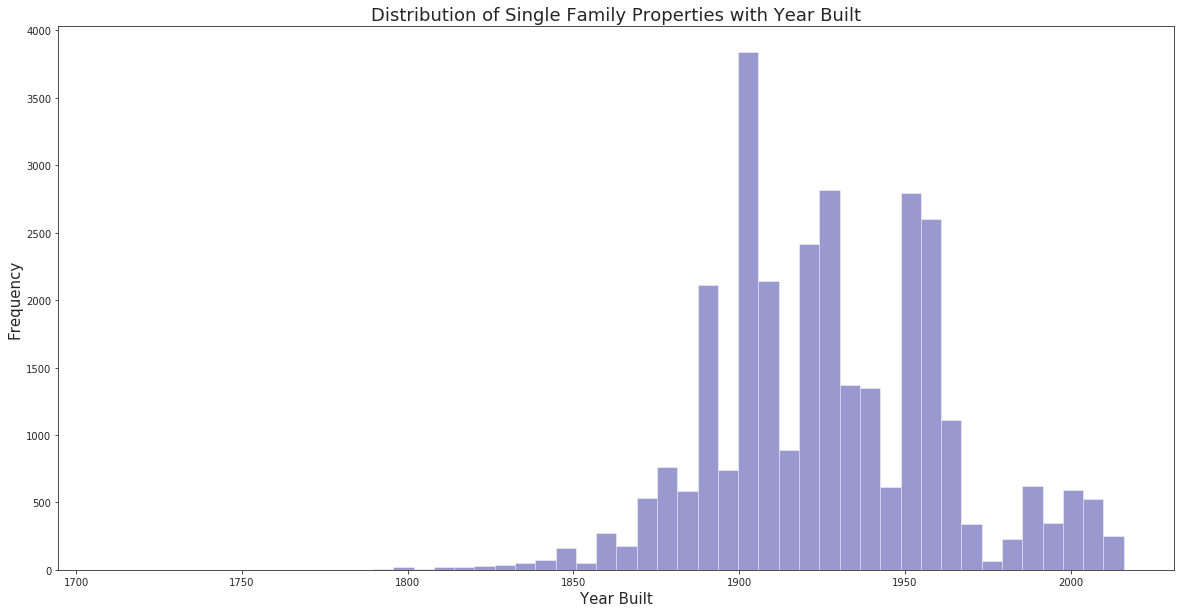

In [15]:
#Histogram for distribution of single family homes

plt.figure(figsize=(20, 10))
with sns.axes_style('white'):
    sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})
    
#Create histogram

    ax = sns.distplot(prop_single_family['Year_Built'], hist=True, kde=False,color = 'darkblue')
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Distribution of Single Family Properties with Year Built',fontsize = 18)
    plt.xlabel('Year Built',fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)

From this chart, following insights are generated: 
- There is an upward trend from year 1800 to 1900 in the construction of single family properties but then the count declined.
- The construction of single family properties was higher in between years 1890- 1950
- The highest number(nearly 3550) of single family properties were created in year 1900.

## Chart 2

This chart has been created to see the patterns of single family homes with the status of Overall Condition of the property and the Year in which those were built(Year_Built). In this chart, Total Assessed Value has been plotted against Year Built using scatterplot. The size of bubble indicates the magnitude of Total Assessed Value which indicates that bigger the size of bubble, higher is the Total Assessed Value. The color indicates the Overall condition of the properties which has been categorized into 5 types,  from Poor to Excellent conditions. 

I have used one custom function here from the python script:
- find_annotation_position is used to annotate datapoint with maximum Total Assessed Value at particular year built .

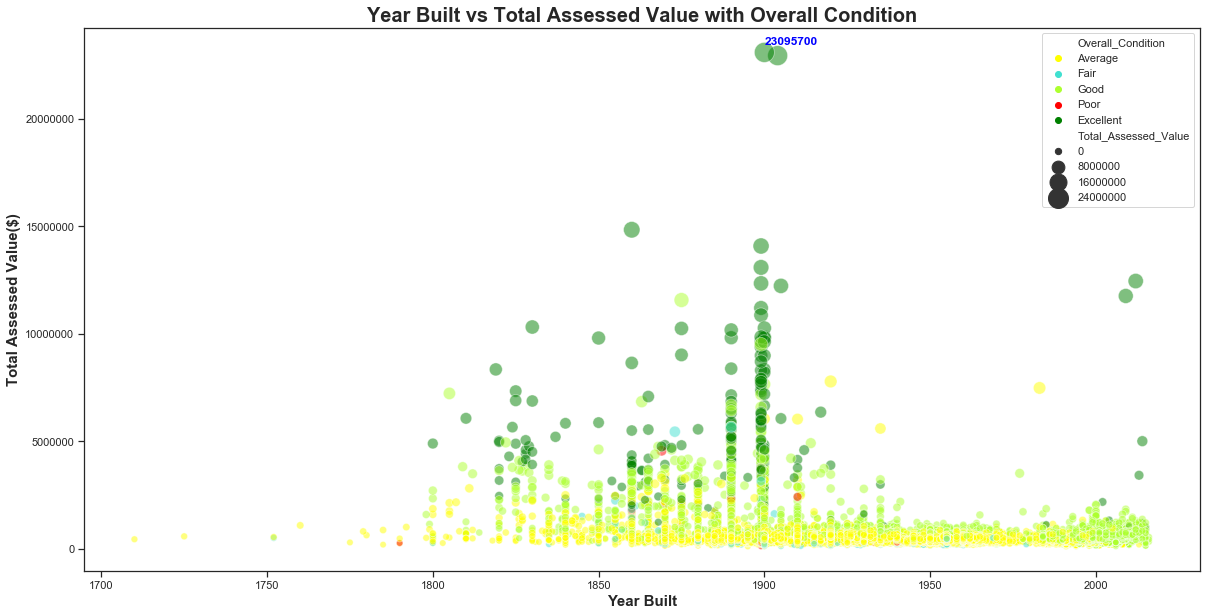

In [16]:
# Scatterplot for Year Built vs Total Assessed Value

sns.set()

#Setting the plot size
plt.figure(figsize=(20, 10))


#Create a custom color palette for indicating different conditions
palette=dict(Poor="red", Excellent="green", Fair="turquoise",Good ="greenyellow",Average="yellow")

with sns.axes_style('white'):
    sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

#Create scatterplot

    ax = sns.scatterplot(data=prop_single_family,  x= 'Year_Built',y='Total_Assessed_Value',\
                         size ="Total_Assessed_Value",hue ='Overall_Condition',palette =palette, \
                         alpha=.5,sizes =(40,400))
    ax.set_title('Year Built vs Total Assessed Value with Overall Condition',fontsize=20,weight='semibold')
    ax.set_xlabel('Year Built',fontsize=15,weight='semibold')
    ax.set_ylabel('Total Assessed Value($)',fontsize=15,weight='semibold')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    
# Calculate the annotation positions where annotated text is need to be displayed

    y_coor = find_annotation_position(data=prop_single_family,row_indexer="Year_Built",\
                                      column_indexer="Total_Assessed_Value",x_pos=1900)
    
# Annotate the coordinates at appropriate position for display to highlight the important data point

    ax.text(1900, y_coor+350000, y_coor,color='blue', weight='semibold')

From this chart, 
- It is evident that the single homes that are in overall "Excellent" conditions(in dark green color) have higher Total Assessed Value in comparison to other conditions. 
- The single family homes with Average condition (in orange color) were built throughout the year spans but most of the houses have total assessed value less than 5M. 
- Very few "Poor" condition homes are visible which has total assessed value less than 5M dollars as indicated in red color.
- There are two properties that are built in year 1900 have extremely higher total assessed value (greater than 23 Millions) are in "Excellent Condition" as annotated in the chart.

## Chart 3

In this chart, Total Assessed Value has been plotted against Remodeling Year with the status of Overall condition of the property. The homes that are not yet remomedled have been ignored in this chart. The size of the bubble indicates the magnitude of total assessed value and color indicates the overall condition of the property.

Following custom functions are used
- column_group_aggregation function to calculate maximum Total Assessed Value per remodeling year
- find_annotation_position function to annotate the important datapoint on the chart

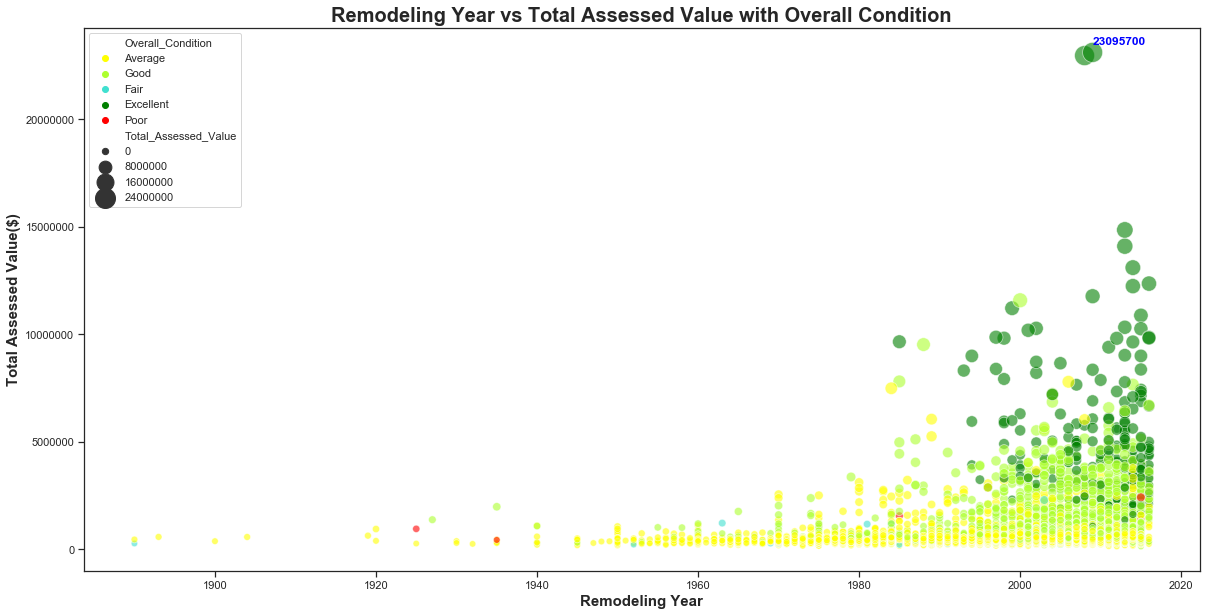

In [17]:
# Scatterplot for Remodelling Year vs Total Assessed Value

sns.set()
plt.figure(figsize=(20, 10))

with sns.axes_style('white'):
    sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

# Only considering the properties that have been remodeled
    remodeling_done = prop_single_family[prop_single_family['Remodeling_Year'] > 0]
    
# Create scatterplot
    ax = sns.scatterplot(data=remodeling_done,  x= 'Remodeling_Year',y='Total_Assessed_Value',\
                         size ="Total_Assessed_Value",hue ='Overall_Condition',palette =palette,alpha=.6,\
                         sizes =(40,400))
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    ax.set_title('Remodeling Year vs Total Assessed Value with Overall Condition',fontsize=20,weight='semibold')
    ax.set_xlabel('Remodeling Year',fontsize=15,weight='semibold');
    ax.set_ylabel('Total Assessed Value($)',fontsize=15,weight='semibold')

# Calculate the annotation positions where annotated text is need to be displayed
    y_coor_r = find_annotation_position(data=prop_single_family,row_indexer="Remodeling_Year",\
                                        column_indexer="Total_Assessed_Value",x_pos=2009)

# Annotate the coordinates at appropriate position for display to highlight the important data point
    ax.text(2009, y_coor_r+350000, y_coor_r,color='blue', weight='semibold')


In this chart, following insights are generated:
- Most of the single houses that are in "Excellent" or "Good" conditions are remodeled later than year 1985.
- The total assessed value is higher for overall "Excellent" or "Good" conditions peoperties then rest of the conditions as the size of the bubble is greater than others.
- There are two properties that are remodeled in year 2009 have extremely higher total assessed value (greater than 23 Millions) are in "Excellent Condition" and seems to be same properties that were built in year 1900 as found Chart 2. 
- There are two properties that are with "Poor" condition have been remodeled between year 1920 and 1940 which makes sense to me but suprisingly there is on property which is remodeled in year 2016 is in Poor condition as indicated with red bubble.
- The properties that have average,fair or poor conditions have low total assessed value(most of them have Total Assessed Value less than 5 Millions). 
- It is also observed that there are few single family homes with poor conditions as indicated in red were remodeled between years 1920 - 1940.

## Chart 4

To find the pattern of average total assessed value with number of floors for the single family homes, I have created a lineplot between Average Total Assessed Value and Number of Floors.

I have used two custom functions here from the python script:
- column_group_aggregation is used to calculate median Total Assessed Value per Number of floors.
- find_annotation_position is used to annotate datapoint with maximum Total Assessed Value at particular Number of floors.

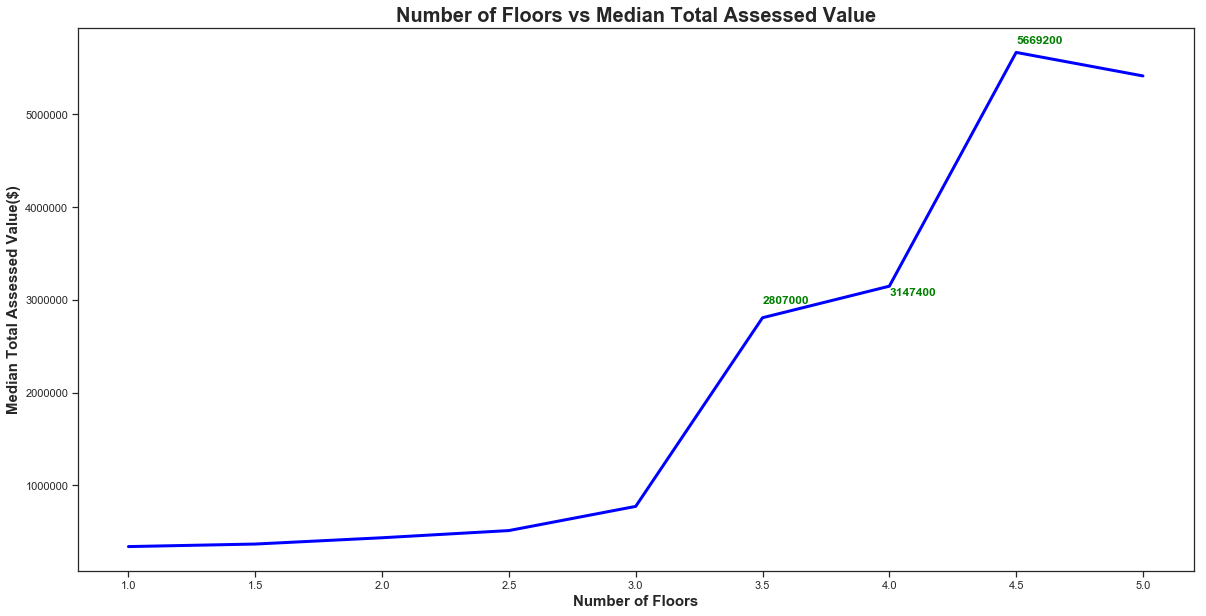

In [18]:
# Line plot for Number of Floors vs Total Assessed Value

# Calculate mean of total assessed value by grouping Number of Floors

total_assessed_value_mean = column_group_aggregation(data = prop_single_family, column_to_group= 'Number_of_Floors',\
                                                     column_to_aggr= "Total_Assessed_Value",aggregation_type ="median" )
total_assessed_value_mean['Total_Assessed_Value'] = data_manipulation(data = total_assessed_value_mean,\
                                column_name = "Total_Assessed_Value",\
                                manipulation_type = "convert data type",\
                                manipulation_value ='int')

sns.set()

# Setting the plot size

plt.figure(figsize=(20, 10))

with sns.axes_style('white'):
    sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

# Create line plot
    ax = sns.lineplot(x="Number_of_Floors",y="Total_Assessed_Value" , color= "blue",linewidth ='3',\
                      data=total_assessed_value_mean)
    
    ax.set_title('Number of Floors vs Median Total Assessed Value',fontsize=20,weight='semibold')
    ax.set_xlabel('Number of Floors',fontsize=15,weight='semibold');
    ax.set_ylabel('Median Total Assessed Value($)',fontsize=15,weight='semibold')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    
# Calculate the annotation positions where annotated text is need to be displayed
    y_coor_1 = find_annotation_position(data=total_assessed_value_mean,row_indexer="Number_of_Floors",\
                                        column_indexer="Total_Assessed_Value",x_pos=3.5)
    y_coor_2 = find_annotation_position(data=total_assessed_value_mean,row_indexer="Number_of_Floors",\
                                        column_indexer="Total_Assessed_Value",x_pos=4)
    y_coor_3 = find_annotation_position(data=total_assessed_value_mean,row_indexer="Number_of_Floors",\
                                        column_indexer="Total_Assessed_Value",x_pos=4.5)
    
# Annotate the coordinates at appropriate position for display to highlight the important data points.
    ax.text(3.5, y_coor_1+150000, y_coor_1,color='green', weight='semibold')
    ax.text(4.0, y_coor_2-100000, y_coor_2,color='green', weight='semibold')
    ax.text(4.5, y_coor_3+100000, y_coor_3,color='green', weight='semibold')
    
    

Following are the observations from this chart:
- There is upward trend for total assessed value as the number of floors are increasing. 
- The total assessed value is gradually increasing upto 3 floors of single family homes. 
- There is substantial increase in the median total assessed value to 2.8 Millions if the floors reaches to 3.5. 
- Only 12.1% increase is there in median value if number of floors is 4 in the single family homes. 
- There is 80% of increase in median total assessed value if the number of floors in the property are 4.5. 


## Chart 5

The below chart has been created between Total assessed Value and Living Area of single family homes using scatterplot. The size of the bubble indicates the magnitude of Total Assessed Value. As the size of bubble increases so the Total Assessed Value of a property.

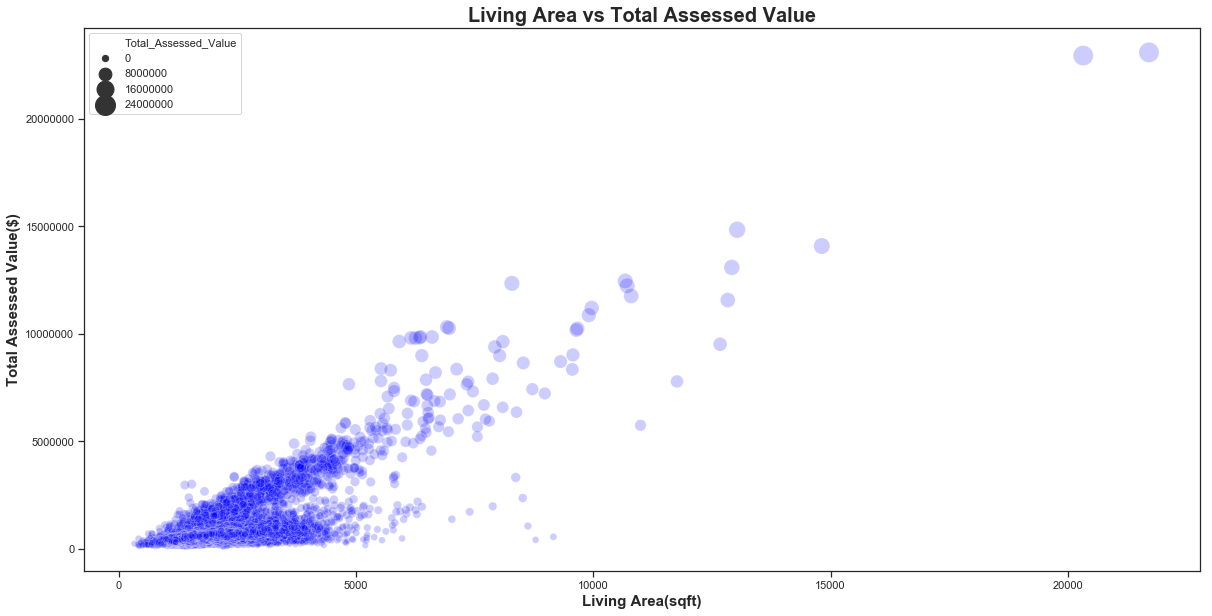

In [19]:
# Scatterplot of Living Area vs Total Assessed Value
sns.set()
plt.figure(figsize=(20, 10))

with sns.axes_style('white'):
    sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

# Create scatter plot
    ax = sns.scatterplot(x="Living_Area",y ="Total_Assessed_Value", data =prop_single_family,color='blue',\
                         size = "Total_Assessed_Value",sizes=(40,400),alpha = 0.2)
    ax.set_title('Living Area vs Total Assessed Value',fontsize=20,weight='semibold')
    ax.set_xlabel('Living Area(sqft)',fontsize=15,weight='semibold');
    ax.set_ylabel('Total Assessed Value($)',fontsize=15,weight='semibold')
    plt.ticklabel_format(style='plain', axis='y')

In this chart: 
- There is an Living area seems to have positive relationship with total assessed value. 
- As the Living Area increasing the Total Assessed Value is also increasing for single family homes 
- For the properties that have living area higher than 20K sqft have total assessed value greater than 20 million dollars. 
- There are two properties which seems to be outliers have living area > 20K. 
- Only 0.5% of properties have living area greater than 5000 sqft.

## Chart 6

The below chart has 2 subplots that shows the barplot of Exterior and Interior Finish to median Total Assessed Value for single family homes.

I have used column_group_aggregation function to calculate median value of Total Assessed Value based on Exterior and Interior finishes.

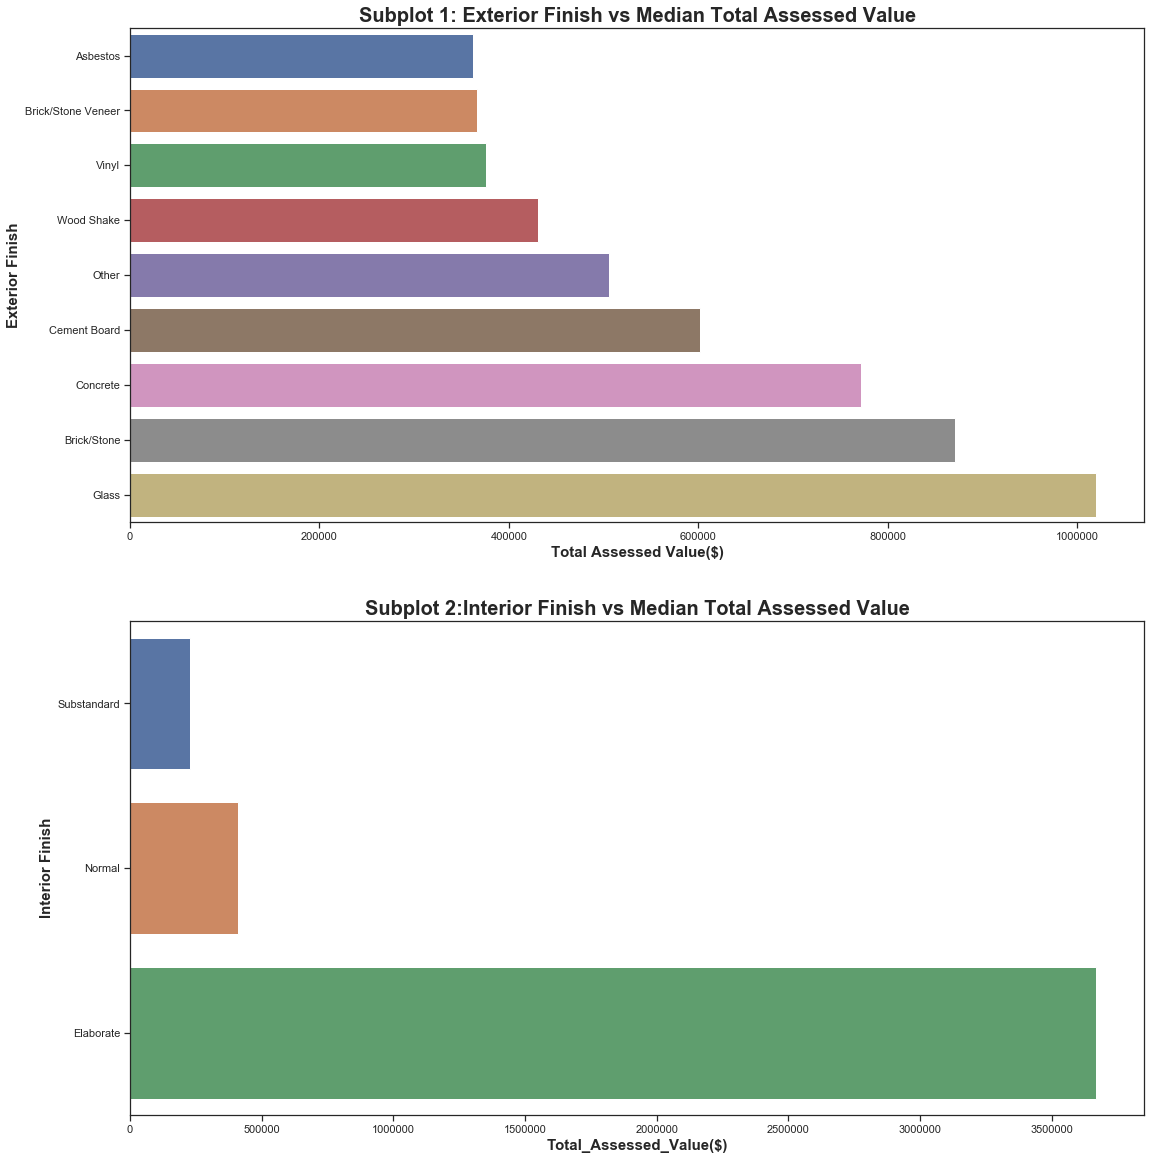

In [20]:
# Barplots for Interior and Exterior Finish vs Median Total Assessed Value


# Compute median of Total Assessed Value grouping by Exterior Finish
prop_exterior_fin = column_group_aggregation(data = prop_single_family,column_to_group= 'Exterior_Finish',\
                                             column_to_aggr="Total_Assessed_Value",aggregation_type= "median")
prop_exterior_fin_sorted = prop_exterior_fin.sort_values(by = 'Total_Assessed_Value')

# Compute median of Total Assessed Value grouping by Interior Finish
prop_interior_fin = column_group_aggregation(data= prop_single_family,column_to_group='Interior_Finish',\
                                             column_to_aggr="Total_Assessed_Value",aggregation_type="median")
prop_interior_fin_sorted = prop_interior_fin.sort_values(by = 'Total_Assessed_Value')

sns.set()
fig = plt.figure(figsize=(40, 20))

with sns.axes_style('white'):
    sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

# Subplot 1 : Exterior Finish vs Median Total Assessed Value
    plt.subplot(221) 
    
    ax =sns.barplot(x= "Total_Assessed_Value",y = "Exterior_Finish" ,data =prop_exterior_fin_sorted)
    ax.set_title('Subplot 1: Exterior Finish vs Median Total Assessed Value',fontsize=20,weight='semibold')
    ax.set_xlabel('Total Assessed Value($)',fontsize=15,weight='semibold');
    ax.set_ylabel('Exterior Finish',fontsize=15,weight='semibold')
    plt.ticklabel_format(style='plain', axis='x')
    
# Subplot 2 : Interior Finish vs Median Total Assessed Value
    plt.subplot(223) 
    
    ax =sns.barplot(x= "Total_Assessed_Value",y = "Interior_Finish" ,data= prop_interior_fin_sorted)
    ax.set_title('Subplot 2:Interior Finish vs Median Total Assessed Value',fontsize=20,weight='semibold')
    ax.set_xlabel('Total_Assessed_Value($)',fontsize=15,weight='semibold')
    ax.set_ylabel('Interior Finish',fontsize=15,weight='semibold')
    plt.ticklabel_format(style='plain', axis='x')


Following are the insights generated from these two plots:
- The first barplot indicates that Glass type of exterior finish has highest median Total Assessed Value where Asbetos finish has lowest median Total Assessed Value. 
- Asbetos, Brick/Stone Veneer and Vinyl have close median total assessed values.
- From the second barplot, it is evident that elborate type of interior finish is costlier than other categories. 
- On further investigation, it is found that Vinyl type of exterior finish and normal type of interior finish are mostly used in the single family properties.

## Chart 7

To explore the relationship between Zipcode with Total Assessed Value, I have used countplot and lineplot.The countplot provides the number of properties that located on a particular zipcode. The line plot has been added as secondary y-axis to indicate the median total assessed value corresponding to each zipcode for single family property.

I have used two custom functions here from the python script:
- column_group_aggregation is used to calculate median Total Assessed Value per Zipcode.
- find_annotation_position is used to annotate datapoint with maximum Total Assessed Value at particular Zipcode.

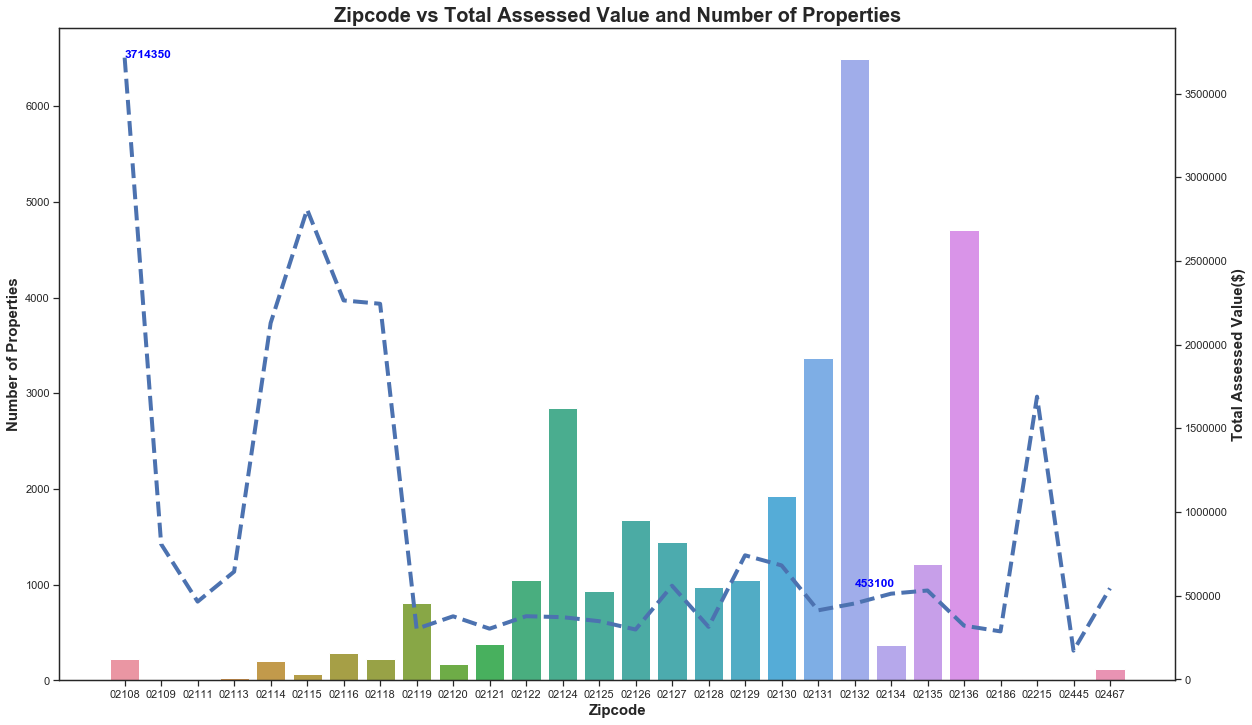

In [21]:
# Create countplot and lineplot between Zipcode and Total Assessed Value

fig = plt.figure(figsize=(20, 12))
zipcode_agg = column_group_aggregation(data=prop_single_family,column_to_group='Zipcode',\
                                       column_to_aggr="Total_Assessed_Value",aggregation_type="median")

with sns.axes_style('white'):
    sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

# Creating count plot for Zipcode
    ax = sns.countplot(x="Zipcode",data=prop_single_family)
    ax.set_title('Zipcode vs Total Assessed Value and Number of Properties',fontsize=20,weight='semibold')
    ax.set_ylabel('Number of Properties',fontsize=15,weight='semibold')
    ax.set_xlabel('Zipcode',fontsize=15,weight='semibold')
    ax2 = ax.twinx()

# Creating line plot between Zipcode and median Total assessed value
    ax2 = sns.lineplot (x ="Zipcode" ,y =zipcode_agg['Total_Assessed_Value'],ax= ax2,data = zipcode_agg,\
                        linewidth =4)
    ax2.set_ylabel('Total Assessed Value($)',fontsize=15,weight='semibold')
    ax2.lines[0].set_linestyle("--")
    
# Calculate the annotation positions where annotated text is need to be displayed
    y_02108 = find_annotation_position(data=zipcode_agg,row_indexer="Zipcode",\
                                       column_indexer="Total_Assessed_Value",x_pos='02108')
    y_02132 = find_annotation_position(data=zipcode_agg,row_indexer="Zipcode",\
                                       column_indexer="Total_Assessed_Value",x_pos='02132')
    
# Annotate the coordinates at appropriate position for display to highlight the important data points.
    ax2.text('02108', y_02108, y_02108,color='blue', weight='semibold')
    ax2.text('02132', y_02132+100000, y_02132,color='blue', weight='semibold')
    


In this plot following are the insights:
- the highest number of properties(greater than 6400) located at zipcode 02132 that have been assessed and the median total assessed value is under 500 K dollars in this zipcode. 
- It is also found that median total assessed value is highest(> 3.7 Million dollars) for zipcode 02108 but it has very less number of properties at that location.

The highest median value for zipcode 02108, makes sense to me since on further investigation I found that it corresponds to Beacon Hill which is neigbourhood of Boston's financial district.


# Descriptive Analysis

Descriptive analysis is used to summarize the data which helps in providing information on distribution of data. Since list of variables is long, I have summarized the data into two parts. First summary is based on numerical columns and second summary is for string objects.

In [22]:
# Descriptive Analysis of numerical columns

pd.set_option('display.float_format', lambda x: '%.2f' % x)
# prop_single_family.describe(include=all)
prop_single_family.describe(include=[np.number])

,Year_Built,Total_Assessed_Value,Living_Area,Remodeling_Year,Number_of_Floors,Number_of_Bedrooms,Number_of_Baths
count,30575.00,30575.00,30575.00,30575.00,30575.00,30575.00,30575.00
mean,1926.97,534818.15,1753.23,681.71,1.87,3.39,1.43
std,34.92,634773.46,759.39,948.15,0.57,1.01,0.69
min,1710.00,101300.00,332.00,0.00,1.00,0.00,0.00
25%,1900.00,325550.00,1306.00,0.00,1.50,3.00,1.00
50%,1925.00,412100.00,1588.00,0.00,2.00,3.00,1.00
75%,1950.00,533950.00,2000.00,1996.00,2.00,4.00,2.00
max,2016.00,23095700.00,21711.00,2016.00,5.00,12.00,21.00


- The oldest single family property was built in 1710 and 75% the properties were built before year 1950. 
- The average total assessed value is 0.5 million dollars. 
- Highest total assessed value is greater than 23 million dollars which seems to be for the outliers that were identified charts 2 and 3 . 
- 50% of properties(2nd quartile) have total assessed value below 412100 dollars.
- The average size of living area in single family homes is 1753.23 sqft. 75% of properties(3rd quartile) have living area below 2000 sqft and smallest living area is 332 sqft for single family homes.
- Standard deviation of living area as 759.39 indicates that 68% of all the peoperties are within 759 sqft on either sides of average.
- 50% of properties(2nd quartile) are not remodeled.
- 75% of properties(3rd quartile) have upto 2 floors and maximum number of floors are 5 for single family homes. 
- 25% of single family properties have number of bedrooms less than 3. There are houses with no bedrooms as minimum value is 0. Maximum value of number of bedrooms is 12 for single family homes.
- 75% of single family properties have number of baths less than 2.There are houses with with no baths as minimum value is 0.

Surprisingly there are single family homes that have maximum number of baths upto 21 which is huge for single family homes. On further investigation it seems it is a incorrect data since all other variables such as Living area, number of bedrooms are very small as shown below:
 

In [23]:
# Incorrect entry with huge number of bathrooms

prop_single_family[prop_single_family['Number_of_Baths'] == 21]

,Parcel_Number,Zipcode,Property_Type,Year_Built,Total_Assessed_Value,Living_Area,Remodeling_Year,Number_of_Floors,Number_of_Bedrooms,Number_of_Baths,Building_Style,Exterior_Finish,Bath_Style,Kitchen_Style,Exterior_Condition,Overall_Condition,Interior_Condition,Interior_Finish,Residential_View
90977,1302757000,02125,1-Family,1890,499700,2386.00,2001,2.00,3.00,21.00,Colonial,Vinyl,Modern,Modern,Average,Average,Average,Normal,Average


In [24]:
# Descriptive Analysis of categorical or string columns

prop_single_family.describe(include=[np.object])

,Parcel_Number,Zipcode,Property_Type,Building_Style,Exterior_Finish,Bath_Style,Kitchen_Style,Exterior_Condition,Overall_Condition,Interior_Condition,Interior_Finish,Residential_View
count,30575,30575,30575,30575,30575,30575,30575,30575,30575,30575,30575,30575
unique,30575,28,1,8,9,4,4,5,5,5,3,5
top,2204128005,02132,1-Family,Colonial,Vinyl,Semi-Modern,Semi-Modern,Average,Average,Average,Normal,Average
freq,1,6492,30575,16685,15427,18589,16966,23495,24063,20718,30105,27642


- Parcel number is unique as indicated by frequency as 1 in the summary.
- There are 28 unique zipcodes where single family homes are located. The top zipcode is 02132 with frequency 6492 which is already observed during chart 7 that this zipcode has highest number of single family properties. On further investigation this zipcode is found for West Roxbury neighbourhood.
- Colonial type of building style is most popular since has been used in more than 16K properties
- Vinyl type of exterior finish and Normal type of interior finish are mostly used in single home properties which was observed in chart 6 too.
- Most of the single family properties(23495) have overall average condition. Almost 23K properties are with average exterior condition and 20K properties are with average interior condition.
- The popular bath and kitchen styles are semi-modern.
- Approx 27K single family houses have average residential view.

# Predictive Analysis

I have conducted predictive modeling to predict "if the total assessed value will be greater than median total assessed value for single family properties". I have used supervised machine learning algorithm and used Logistic Regression to solve a binary classification problem. 

I have computed the median value using data_manipulation function and converted to int data type to use it to create target variable.

In [25]:
# Calculate median total assessed value and convert to int

median_Total_Assessed_Value = data_manipulation(data = prop_single_family,\
                                               column_name ="Total_Assessed_Value",\
                                               manipulation_type ='calc aggregation',\
                                               manipulation_value ="median")

median_Total_Assessed_Value = data_manipulation(data = median_Total_Assessed_Value,\
                                               column_name ="Total_Assessed_Value",\
                                               manipulation_type ='convert data type',\
                                               manipulation_value ="int")

print("The median value of total assessed value is ${}.".format(median_Total_Assessed_Value))

The median value of total assessed value is $412100.


## Create target variable

I have created an new target variable as OUTPUT_LABEL on cleaned property dataframe which will contain a binary value as 1 or 0 depending on the condition, if median is greater than total assessed value or not. This OUTPUL_LABEL is the dependent variable that will be predicted using logistic regression model. The data type has been casted as int so that boolean value is changed to binary outcome.

In [26]:
# Create target variable OUTPUT_LABEL and data type is changed to convert the boolean to binary value

prop_single_family['OUTPUT_LABEL']=(prop_single_family.Total_Assessed_Value >= median_Total_Assessed_Value).astype('int')


In [27]:
# Showing the OUTPUL_LABEL that has been created at the end of the cleaned dataset
prop_single_family.head()

,Parcel_Number,Zipcode,Property_Type,Year_Built,Total_Assessed_Value,Living_Area,Remodeling_Year,Number_of_Floors,Number_of_Bedrooms,Number_of_Baths,Building_Style,Exterior_Finish,Bath_Style,Kitchen_Style,Exterior_Condition,Overall_Condition,Interior_Condition,Interior_Finish,Residential_View,OUTPUT_LABEL
145,0401786000,02215,1-Family,1880,2150600,4375.00,0,3.00,7.00,2.00,Other,Brick/Stone,Semi-Modern,Semi-Modern,Average,Average,Average,Normal,Good,1
196,0100021000,02128,1-Family,1910,195600,1122.00,1965,2.00,3.00,1.00,Colonial,Vinyl,Semi-Modern,Semi-Modern,Average,Average,Average,Normal,Fair,0
202,0100027000,02128,1-Family,1900,313400,1968.00,1980,2.00,4.00,1.00,Colonial,Vinyl,Semi-Modern,Semi-Modern,Average,Average,Average,Normal,Average,0
208,0100033000,02128,1-Family,1920,309900,1111.00,0,1.50,4.00,1.00,Other,Vinyl,Modern,Modern,Average,Average,Average,Normal,Average,0
217,0100041000,02128,1-Family,1900,306500,1146.00,1991,1.50,3.00,1.00,Other,Vinyl,Semi-Modern,Semi-Modern,Good,Average,Average,Normal,Average,0


Before creating the prediction model, I checked the prevalance to see the percentage of positive class with the total number of observations using calc_prevalence function

In [28]:
prevalence_post = calc_prevalence(data = prop_single_family,column_name = 'OUTPUT_LABEL')
print('Prevalence of the positive class: {:.2f}'.format(prevalence_post))

Prevalence of the positive class: 0.50


This implies that 50% of single homes have Total assessed value greater than the median Total Assessed value.

## Feature engineering

To build the prediction model, I have created numerical and categorical features. The categrical features will be converted to binary values using one hot encoding using get_dummies function so that those variables can be part of prediction model for better prediction.

In [29]:
# Numerical Features
cols_num = ['Zipcode','Year_Built', 'Living_Area', 'Remodeling_Year',
       'Number_of_Floors', 'Number_of_Bedrooms', 'Number_of_Baths']

# Categorical Features
cols_cat = ['Building_Style', 'Exterior_Finish', 'Bath_Style',
       'Kitchen_Style', 'Exterior_Condition', 'Overall_Condition',
       'Interior_Condition', 'Interior_Finish', 'Residential_View','Property_Type']

In [30]:
#Convert the categorical Features to binary representation using one hot endcoding

prop_single_family_cat = pd.get_dummies(prop_single_family[cols_cat],drop_first = True)

# Create list of categorical features

cols_all_cat = list(prop_single_family_cat.columns)

print('Following is the count summary of features that have been created:')
print('Total number of features:', len(cols_num + cols_all_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))


Following is the count summary of features that have been created:
Total number of features: 46
Numerical Features: 7
Categorical Features: 39


I have merged the features with clean dataset and then created a new data frame that will have contain only numerical and categorical features with the target variable. 

In [31]:
# Concatenate the encoded categorical features to original dataset
prop_single_family_mergd = pd.concat([prop_single_family,prop_single_family_cat],axis = 1)

# Create a new dataframe that will contain only numerical and categorical features with OUTPUT_LABEL 
cols_input = cols_num + cols_all_cat
prop_single_family_model =prop_single_family_mergd[cols_input + ['OUTPUT_LABEL']]

#Split the data such that X will contain all the features and y will contain target variable
X =  prop_single_family_model.drop('OUTPUT_LABEL',axis=1)
y = prop_single_family_model['OUTPUT_LABEL']


## Splitting into Training and Testing datasets

Build the Training and Testing dataset by splitting  it into 80:20 ratio so that model can be fitted on the training dataset and then evaluated on test dataset. The summary of the shapes of splitted datasets is also shown below:

In [32]:
# Splitting the dataset in training and testing dataset in 80:20 ratio.
# random_state has been defaulted to 42 as seed value, so that it retrieves same result every time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Determining the shape of splitted datasets

print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (24460, 46)
Shape of X_test: (6115, 46)
Shape of y_train: (24460,)
Shape of y_test: (6115,)


## Train Prediction model

I have built Logistic regression model for predicting the target variable using scikit learn Logistic Regression classifier. I have used C=0.006 which is regularization term in the logistic model. Smaller the C, stronger the regularization and is added to reduce the overfitting.

In [33]:
# Building a logistic regression mode;

lr = LogisticRegression(random_state = 42,C= 0.006,max_iter = 600)
# where C = regularization term
# random_state = seed of the pseudo random number generator to use when shuffling the data
# max_iter = Maximum number of iterations

# fitting the model
lr.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.006, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=600, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Model Evaluation

Once the model is built and fitted, it is evaluated on test dataset as below and then performance is evaluated using confusion matrix and performance metrics is calculated.

In [34]:
# predicting the target variable

y_pred = lr.predict(X_test)

In [35]:
# Creating the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
#print(confusion_mat)
TF = confusion_mat[0,0]
TN = confusion_mat[0,1]
FP = confusion_mat[1,0]
FN = confusion_mat[1,1]

print("Confusion Matrix summary:")
print("True positive: {} - implying model predicted a positive result and it was positive".format(TF))
print("True negative: {} - implying model predicted a negative result and it was negative".format(TN))
print("False positive: {} - implying model predicted a positive result and it was negative".format(FP))
print("False negative: {} - implying model predicted a negative result and it was positive".format(FN))

Confusion Matrix summary:
True positive: 2387 - implying model predicted a positive result and it was positive
True negative: 712 - implying model predicted a negative result and it was negative
False positive: 873 - implying model predicted a positive result and it was negative
False negative: 2143 - implying model predicted a negative result and it was positive


In [36]:
# Calculate accuracy score

accuracy_score = lr.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score))

Accuracy of logistic regression classifier on test set: 0.74


The accuracy of this model is 74% which is ratio of number of correct predictions to the total number of the predictions.

## Plotting Observed and Predicted values

I have ran the fitted model to entire dataset to plot predicted value against the each property(index). The color of bubbles indicates the corresponding observed value(target variable, OUTPUT_LABEL).

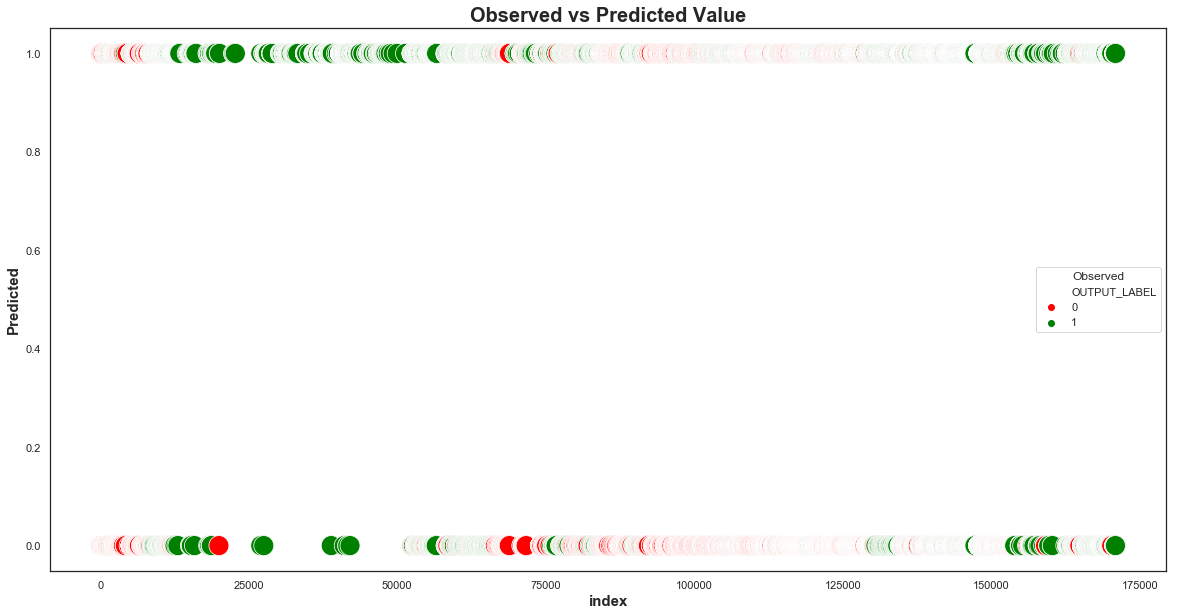

In [37]:
# Create a new variable to predict the target variables logistic regression model which was trained earlier
prop_single_family['Predicted_Value'] = lr.predict(X)

sns.set()
plt.figure(figsize=(20, 10))

with sns.axes_style('white'):
    ax =sns.scatterplot(prop_single_family.index, y ='Predicted_Value',data = prop_single_family, \
                        hue = 'OUTPUT_LABEL',s=400,palette = dict({1:"green",0:"red"}))
    ax.set_title('Observed vs Predicted Value',fontsize=20,weight='semibold')
    ax.set_ylabel('Predicted',fontsize=15,weight='semibold')
    ax.set_xlabel('index',fontsize=15,weight='semibold')
    ax.legend(title='Observed')



In this plot, the predicted value is either 1 or 0. 1 implies that predicted total assesed value is greater than median total assessed value and 0 implies that predicted total assessed value is less than median value. It is evident that there are few data points where observed value is not same as predicted value.For instance, when the predicted value is 1, many red bubbles are identified which means observed value is 0. Similarly, when the predicted value is 0, many green bubbles are observed indicating observed value as 1.


# Conclusion

The detailed analysis on property assessement for single family in Boston city has been done using Python programming from the 2017 year dataset. Python has extensive support of libraries that were very useful for this project. The functions created in the python script helped to remove the redundant code and made the data cleaning easier. With the data visualization, important trends were determined which helped to generate the valuable insights. In year 1900, the highest number of properties were built. The median of total assessed value has been found 412K dollars.Vinyl type of exterior finish and normal interior finish are most popular.It is observed as the number of floors, baths or bedrooms increases, the total assessed value also increases.Living Area also played significant role on the total assessed value. The properties with excellent and good conditions have higher total assessed value but more than 23K properties are with average conditions. The zipcode 02132 has highest number of properties located though zipcode 02108 has higher median total assessed value. Zipcode 02108 corresponds to Beacon Hill which is near to Boston financial district. Using scikit learn library, logistic regression prediction model was used to solve the classification problem to predict if total assessed value is greater than median total assessed value or not. The model  was trained and fitted on training dataset. The model was then evlauated on test dataset and resulted 74% of accuracy and supporting the story that property characteristics impact and are significant to total assessed value. The accuracy can be further optimized by hyperparameter tuning and adding more features to the model.

## References
(n.d).Property Assessment FY2017 data key.Retrieved 2019,June 25 from https://data.boston.gov/dataset/property-assessment/resource/d195dc47-56f6-437c-80a8-7acbb8a2aa6d

Property Assessment. (n.d.). Retrieved 2019, June 25 from https://data.boston.gov/dataset/property-assessment